<a href="https://colab.research.google.com/github/shivamm007/Titanic_eda_and_analytics/blob/main/Titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I have done Exploratory Data Analysis and Predicted the outcomes manually by visualizing and interpreting from data, without using any machine learning algorithm and technique and got an accuracy of 81.48% which is quite fair.

Data
The dataset used in this project is included as titanic_data.csv. This dataset is provided by Udacity and contains the following attributes:

Features

pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name : Name

sex : Sex

age : Age

sibsp : Number of Siblings/Spouses Aboard

parch : Number of Parents/Children Aboard

ticket : Ticket Number

fare : Passenger Fare

cabin : Cabin

embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

survival : Survival (0 = No; 1 = Yes)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [37]:
titanic_df = pd.read_csv('/content/full.csv')

In [38]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [39]:
titanic_df.shape

(1309, 21)

columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability

In [40]:
titanic_df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)

In [57]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   object 
 8   WikiId       1304 non-null   float64
 9   Name_wiki    1304 non-null   object 
 10  Age_wiki     1302 non-null   float64
 11  Hometown     1304 non-null   object 
 12  Boarded      1304 non-null   object 
 13  Destination  1304 non-null   object 
 14  Lifeboat     502 non-null    object 
 15  Body         130 non-null    object 
 16  Class        1304 non-null   float64
dtypes: float64(6), int64(3), object(8)
memory usage: 174.0+ KB


In [58]:
titanic_df['Survived'].astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: category
Categories (2, float64): [0.0, 1.0]

In [42]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [43]:
titanic_df.nunique()

Survived          2
Pclass            3
Sex               2
Age              98
SibSp             7
Parch             8
Fare            281
Cabin           186
Embarked          3
WikiId         1304
Name_wiki      1303
Age_wiki         78
Hometown        566
Boarded           4
Destination     291
Lifeboat         24
Body            130
Class             3
dtype: int64

In [59]:
titanic_df.isnull().sum()

Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              0
Embarked          0
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [45]:
titanic_df.Fare.fillna(titanic_df.Fare.mean(),inplace=True)

In [50]:
titanic_df['Age'].dropna(inplace = True)

In [52]:
titanic_df.drop(columns=['Cabin'],inplace=True)

In [53]:
titanic_df['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [72]:
titanic_df['Age'].max()

80.0

In [54]:
#we will simply fill it up with the most common value, that is 'S'
titanic_df['Embarked'].fillna('S',inplace=True)

In [62]:
titanic_df['Pclass']=titanic_df['Pclass'].astype('object')
titanic_df['Pclass'].replace({1:'Upper Class',2:'Middle Class',3:'Lower Class'},inplace=True)

In [15]:
# Number of passengers in each class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    323
2    277
3    709
Name: Pclass, dtype: int64

In [16]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    466
male      843
Name: Sex, dtype: int64

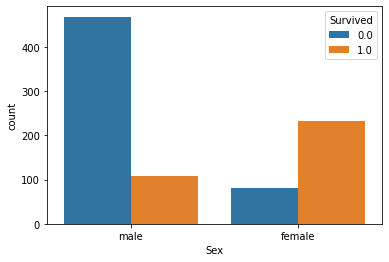

In [60]:
sns.countplot(x='Sex',hue='Survived',data=titanic_df)

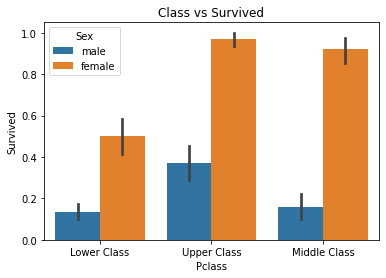

In [64]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)
plt.title('Class vs Survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Age')

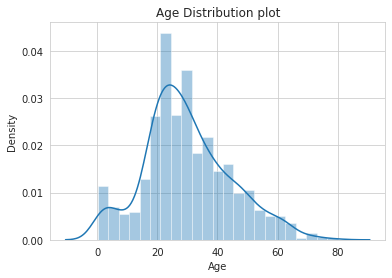

In [69]:
sns.set_style("whitegrid")
sns.distplot(titanic_df['Age'])
plt.title('Age Distribution plot')
plt.xlabel('Age')

Text(0.5, 1.0, 'Scatter Plot')

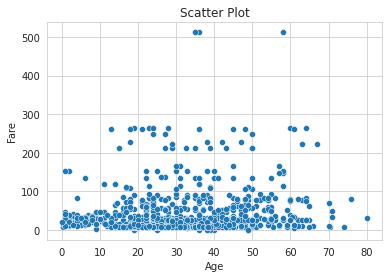

In [70]:
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic_df)
plt.title('Scatter Plot')

In [71]:
px.scatter(data_frame=titanic_df,x='Pclass',y='Fare')

In [75]:
px.histogram(data_frame=titanic_df,x='Embarked',y='Survived')